In [188]:
import numpy as np 
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('Dacon/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Dacon/daily_temp.csv
Dacon/test.csv
Dacon/sample_submission.csv
Dacon/한국가스공사_시간별 공급량_20181231.csv
Dacon/Catboost_Prophet_yein.ipynb


In [191]:
avg_temp = pd.read_csv('Dacon/daily_temp.csv', encoding='cp949')
avg_temp

,date,avg_temp,max_temp,min_temp,temp_diff
0,2013/01/01,-4.7,0.0,-8.7,8.7
1,2013/01/02,-11.7,-4.8,-15.1,10.3
2,2013/01/03,-13.2,-9.3,-16.4,7.1
3,2013/01/04,-10.7,-5.8,-14.8,9.0
4,2013/01/05,-7.0,-1.2,-12.1,10.9
...,...,...,...,...,...
2276,2019/03/27,11.6,16.2,8.9,7.3
2277,2019/03/28,9.4,14.6,5.6,9.0
2278,2019/03/29,9.2,15.1,5.5,9.6
2279,2019/03/30,5.2,8.4,3.5,4.9


In [139]:
avg_temp['date'] = pd.to_datetime(avg_temp['date'])
avg_temp

,date,avg_temp,max_temp,min_temp,temp_diff
0,2013-01-01,-4.7,0.0,-8.7,8.7
1,2013-01-02,-11.7,-4.8,-15.1,10.3
2,2013-01-03,-13.2,-9.3,-16.4,7.1
3,2013-01-04,-10.7,-5.8,-14.8,9.0
4,2013-01-05,-7.0,-1.2,-12.1,10.9
...,...,...,...,...,...
2551,2019-12-27,-1.7,2.6,-4.6,7.2
2552,2019-12-28,1.1,6.1,-3.6,9.7
2553,2019-12-29,3.8,6.2,1.1,5.1
2554,2019-12-30,2.7,6.8,-5.7,12.5


In [140]:
avg_temp.sample(2)

,date,avg_temp,max_temp,min_temp,temp_diff
619,2014-09-12,21.3,26.6,18.6,8.0
899,2015-06-19,24.5,29.9,20.0,9.9


In [141]:
temp_tmp = avg_temp

In [142]:
avg_temp['date'].dt.month.value_counts()

7     217
5     217
3     217
1     217
12    217
10    217
8     217
11    210
9     210
6     210
4     210
2     197
Name: date, dtype: int64

In [143]:
avg_temp.sample(2)

,date,avg_temp,max_temp,min_temp,temp_diff
358,2013-12-25,-0.5,3.7,-4.4,8.1
68,2013-03-10,1.2,7.9,-1.5,9.4


In [144]:
len(avg_temp[avg_temp['date'].dt.year != 2019])

2191

In [145]:
temp_train = avg_temp.iloc[:len(avg_temp[avg_temp['date'].dt.year != 2019])]
temp_test = avg_temp.iloc[len(avg_temp[avg_temp['date'].dt.year != 2019]):]

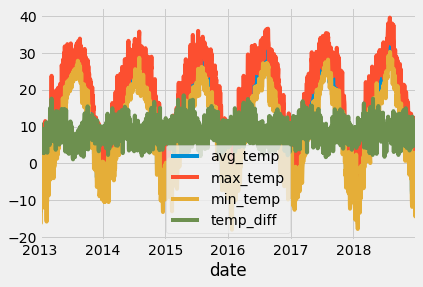

In [146]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
temp_train.set_index('date').plot()

In [147]:
temp_train

,date,avg_temp,max_temp,min_temp,temp_diff
0,2013-01-01,-4.7,0.0,-8.7,8.7
1,2013-01-02,-11.7,-4.8,-15.1,10.3
2,2013-01-03,-13.2,-9.3,-16.4,7.1
3,2013-01-04,-10.7,-5.8,-14.8,9.0
4,2013-01-05,-7.0,-1.2,-12.1,10.9
...,...,...,...,...,...
2186,2018-12-27,-10.1,-6.5,-12.5,6.0
2187,2018-12-28,-10.5,-6.6,-14.4,7.8
2188,2018-12-29,-7.6,-3.0,-10.5,7.5
2189,2018-12-30,-6.8,-0.9,-11.3,10.4


In [148]:
temp_train_prophet = temp_train.copy()
temp_train_prophet.sample(2)

,date,avg_temp,max_temp,min_temp,temp_diff
1830,2018-01-05,-3.0,1.6,-5.6,7.2
1923,2018-04-08,3.9,7.9,0.6,7.3


In [149]:
temp_train_prophet.columns = ['ds', 'y1', 'y2','y3','y4']

In [150]:
timeseries1 = temp_train_prophet.loc[:, ['ds', 'y1']]
timeseries2 = temp_train_prophet.loc[:, ['ds', 'y2']]
timeseries3 = temp_train_prophet.loc[:, ['ds', 'y3']]
timeseries4 = temp_train_prophet.loc[:, ['ds', 'y4']]
timeseries1.columns= ['ds','y']
timeseries2.columns= ['ds','y']
timeseries3.columns= ['ds','y']
timeseries4.columns= ['ds','y']

In [151]:
!pip install neuralprophet

In [152]:
# 상한, 하한 설정 해야하나 ..? 
from neuralprophet import NeuralProphet
model1 = NeuralProphet(
    growth="linear", 
    changepoints=None, 
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     
    ar_sparsity=None,  
    learning_rate=None,
    epochs=40,
    loss_func="Huber",
    normalize="auto",  
    impute_missing=True,
)
metrics1 = model1.fit(timeseries1, freq='d',
                    plot_live_loss=True, epochs=100)

model2 = NeuralProphet(
    growth="linear", 
    changepoints=None, 
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     
    ar_sparsity=None,  
    learning_rate=None,
    epochs=40,
    loss_func="Huber",
    normalize="auto",  
    impute_missing=True,
)
metrics2 = model2.fit(timeseries2, freq='d',
                    plot_live_loss=True, epochs=100)

model3 = NeuralProphet(
    growth="linear", 
    changepoints=None, 
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     
    ar_sparsity=None,  
    learning_rate=None,
    epochs=40,
    loss_func="Huber",
    normalize="auto",  
    impute_missing=True,
)
metrics3 = model3.fit(timeseries3, freq='d',
                    plot_live_loss=True, epochs=100)

model4 = NeuralProphet(
    growth="linear", 
    changepoints=None, 
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     
    ar_sparsity=None,  
    learning_rate=None,
    epochs=40,
    loss_func="Huber",
    normalize="auto",  
    impute_missing=True,
)
metrics4 = model4.fit(timeseries4, freq='d',
                    plot_live_loss=True, epochs=100)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.22E-02, min: 1.61E+00


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.22E-02, min: 1.88E+00


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.22E-02, min: 1.61E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.22E-02
  0%|          | 0/100 [00:00<?, ?it/s]WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py", line 676, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
Epoch[100/100]: 100%|██████████| 100/100 [00:13<00:00,  7.67it/s, SmoothL1Loss=0.00252, MAE=2.33, RMSE=3.02, RegLoss=0]
INFO - (NP.forecaster._handle_missing_data) - dropped 1 NAN row in 'y'
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_au

  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.71E-02, min: 1.74E+00


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.34E-02, min: 1.49E+00


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.34E-02, min: 1.49E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.12E-02
  0%|          | 0/100 [00:00<?, ?it/s]WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py", line 676, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
Epoch[100/100]: 100%|██████████| 100/100 [00:12<00:00,  7.72it/s, SmoothL1Loss=0.00326, MAE=2.74, RMSE=3.47, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.83E-02, min: 9.33E-01


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.83E-02, min: 1.27E+00


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.83E-02, min: 1.38E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.83E-02
  0%|          | 0/100 [00:00<?, ?it/s]WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py", line 676, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
Epoch[100/100]: 100%|██████████| 100/100 [00:13<00:00,  7.39it/s, SmoothL1Loss=0.00275, MAE=2.42, RMSE=3.15, RegLoss=0]
INFO - (NP.forecaster._handle_missing_data) - dropped 1 NAN row in 'y'
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_au

  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.65E-02, min: 1.09E+00


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.11E-02, min: 6.83E-01


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.65E-02, min: 9.33E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.80E-02
  0%|          | 0/100 [00:00<?, ?it/s]WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py", line 676, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
Epoch[100/100]: 100%|██████████| 100/100 [00:12<00:00,  7.75it/s, SmoothL1Loss=0.0214, MAE=2.1, RMSE=2.62, RegLoss=0]


In [153]:
future_dates1 = model1.make_future_dataframe(timeseries1, periods=(90))
future_dates2 = model2.make_future_dataframe(timeseries2, periods=(90))
future_dates3 = model3.make_future_dataframe(timeseries3, periods=(90))
future_dates4 = model4.make_future_dataframe(timeseries4, periods=(90))

In [154]:
result1 = model1.predict(future_dates1)
result2 = model2.predict(future_dates2)
result3 = model3.predict(future_dates3)
result4 = model4.predict(future_dates4)


Text(0.5, 1.0, 'Temperature difference in Seoul')

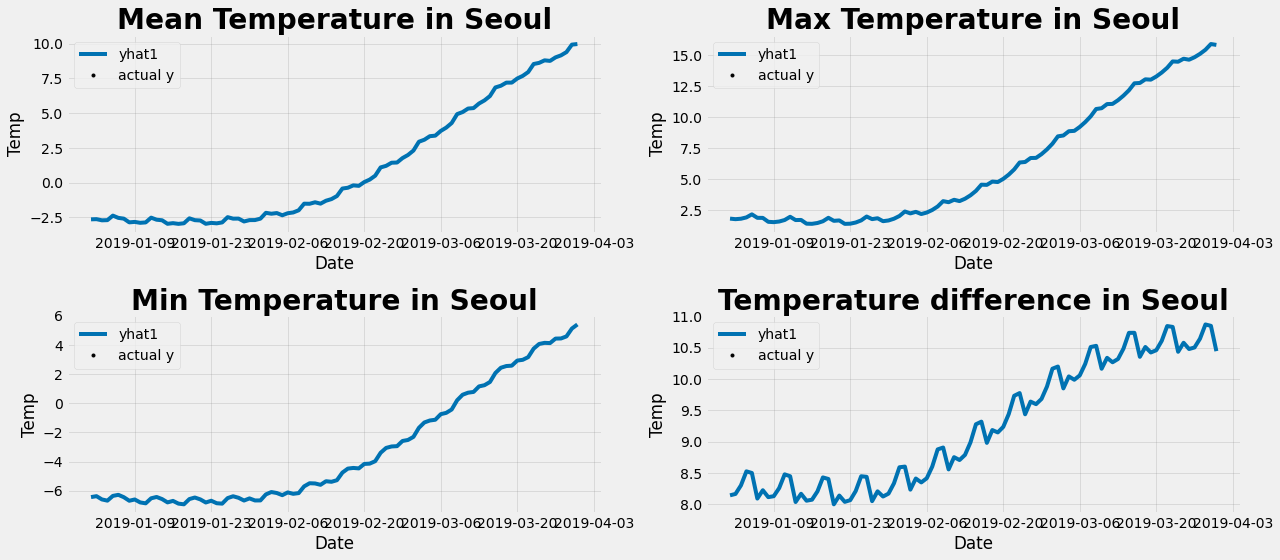

In [155]:
figure, [[ax1,ax2],[ax3, ax4]] = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)
model1.plot(result1, xlabel="Date", ylabel="Temp", ax=ax1)
ax1.set_title("Mean Temperature in Seoul", fontsize=28, fontweight="bold")
model2.plot(result2, xlabel="Date", ylabel="Temp", ax=ax2)
ax2.set_title("Max Temperature in Seoul", fontsize=28, fontweight="bold")
model3.plot(result3, xlabel="Date", ylabel="Temp", ax=ax3)
ax3.set_title("Min Temperature in Seoul", fontsize=28, fontweight="bold")
model4.plot(result4, xlabel="Date", ylabel="Temp", ax=ax4)
ax4.set_title("Temperature difference in Seoul", fontsize=28, fontweight="bold")

In [156]:
temp_test = temp_test.iloc[:90]
temp_test

,date,avg_temp,max_temp,min_temp,temp_diff
2191,2019-01-01,-5.0,-0.6,-8.2,7.6
2192,2019-01-02,-4.9,0.2,-8.8,9.0
2193,2019-01-03,-3.5,3.2,-8.4,11.6
2194,2019-01-04,-1.1,4.1,-6.2,10.3
2195,2019-01-05,-2.8,1.1,-5.5,6.6
...,...,...,...,...,...
2276,2019-03-27,11.6,16.2,8.9,7.3
2277,2019-03-28,9.4,14.6,5.6,9.0
2278,2019-03-29,9.2,15.1,5.5,9.6
2279,2019-03-30,5.2,8.4,3.5,4.9


In [157]:
result1['yhat1'].describe()

count    90.000000
mean      1.061142
std       4.284245
min      -2.963334
25%      -2.615491
50%      -1.072490
75%       4.766829
max       9.964623
Name: yhat1, dtype: float64

In [158]:
result3

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2019-01-01,None,-6.437969,None,8.557367,-14.889733,-0.105603
1,2019-01-02,None,-6.374497,None,8.556393,-14.935625,0.004735
2,2019-01-03,None,-6.599060,None,8.555416,-14.977420,-0.177058
3,2019-01-04,None,-6.681539,None,8.554441,-15.015379,-0.220602
4,2019-01-05,None,-6.355817,None,8.553465,-15.049747,0.140465
...,...,...,...,...,...,...,...
85,2019-03-27,None,4.436571,None,8.474445,-4.042610,0.004735
86,2019-03-28,None,4.445641,None,8.473469,-3.850771,-0.177058
87,2019-03-29,None,4.587034,None,8.472494,-3.664859,-0.220602
88,2019-03-30,None,5.127296,None,8.471518,-3.484687,0.140465


In [159]:
temp_test.reset_index()

,index,date,avg_temp,max_temp,min_temp,temp_diff
0,2191,2019-01-01,-5.0,-0.6,-8.2,7.6
1,2192,2019-01-02,-4.9,0.2,-8.8,9.0
2,2193,2019-01-03,-3.5,3.2,-8.4,11.6
3,2194,2019-01-04,-1.1,4.1,-6.2,10.3
4,2195,2019-01-05,-2.8,1.1,-5.5,6.6
...,...,...,...,...,...,...
85,2276,2019-03-27,11.6,16.2,8.9,7.3
86,2277,2019-03-28,9.4,14.6,5.6,9.0
87,2278,2019-03-29,9.2,15.1,5.5,9.6
88,2279,2019-03-30,5.2,8.4,3.5,4.9


In [160]:
display(result1['yhat1'], temp_test['avg_temp'])

0    -2.638169
1    -2.624551
2    -2.708058
3    -2.695689
4    -2.370288
        ...   
85    9.004529
86    9.150710
87    9.384055
88    9.922242
89    9.964623
Name: yhat1, Length: 90, dtype: float64

2191    -5.0
2192    -4.9
2193    -3.5
2194    -1.1
2195    -2.8
        ... 
2276    11.6
2277     9.4
2278     9.2
2279     5.2
2280     4.4
Name: avg_temp, Length: 90, dtype: float64

In [161]:
date = temp_test.iloc[:90, :]

In [162]:
date['avg_temp'] = result1['yhat1'].values
date['max_temp'] = result2['yhat1'].values
date['min_temp'] = result3['yhat1'].values
date['temp_diff'] = result4['yhat1'].values

In [163]:
temp_test.info()
date 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 2191 to 2280
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       90 non-null     datetime64[ns]
 1   avg_temp   90 non-null     float64       
 2   max_temp   90 non-null     float64       
 3   min_temp   90 non-null     float64       
 4   temp_diff  90 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.6 KB


,date,avg_temp,max_temp,min_temp,temp_diff
2191,2019-01-01,-2.638169,1.845589,-6.437969,8.143541
2192,2019-01-02,-2.624551,1.801854,-6.374497,8.165740
2193,2019-01-03,-2.708058,1.836767,-6.599060,8.302363
2194,2019-01-04,-2.695689,1.943877,-6.681539,8.526129
2195,2019-01-05,-2.370288,2.188214,-6.355817,8.500170
...,...,...,...,...,...
2276,2019-03-27,9.004529,14.815471,4.436571,10.503680
2277,2019-03-28,9.150710,15.083964,4.445641,10.643346
2278,2019-03-29,9.384055,15.415462,4.587034,10.870621
2279,2019-03-30,9.922242,15.875487,5.127296,10.848701


In [164]:
temp_train = temp_train.drop(columns=['temp_diff'])

In [165]:
temp_predict = pd.concat([temp_train, date], ignore_index=True)
temp_predict

,date,avg_temp,max_temp,min_temp,temp_diff
0,2013-01-01,-4.700000,0.000000,-8.700000,NaN
1,2013-01-02,-11.700000,-4.800000,-15.100000,NaN
2,2013-01-03,-13.200000,-9.300000,-16.400000,NaN
3,2013-01-04,-10.700000,-5.800000,-14.800000,NaN
4,2013-01-05,-7.000000,-1.200000,-12.100000,NaN
...,...,...,...,...,...
2276,2019-03-27,9.004529,14.815471,4.436571,10.503680
2277,2019-03-28,9.150710,15.083964,4.445641,10.643346
2278,2019-03-29,9.384055,15.415462,4.587034,10.870621
2279,2019-03-30,9.922242,15.875487,5.127296,10.848701


### 본 데이터 가져오기

In [166]:
train = pd.read_csv('Dacon/한국가스공사_시간별 공급량_20181231 (1).csv', encoding="cp949")
train 

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [167]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    return out
outlier_list= iqr_outliers(train['공급량'])

In [168]:
train = train[~ train['공급량'].isin(outlier_list)]
train

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [169]:
test= pd.read_csv('Dacon/test.csv')
test['연월일'] = test['일자|시간|구분'].apply(lambda x : x.split()[0])
test['시간'] = test['일자|시간|구분'].apply(lambda x : x.split()[1])
test['구분'] = test['일자|시간|구분'].apply(lambda x : x.split()[2])
test = test.drop(columns=['일자|시간|구분'])

In [170]:
len(test)

15120

In [171]:
all_data = pd.concat([train, test])
all_data.head(50)

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
5,2013-01-01,6,A,2390.961
6,2013-01-01,7,A,2378.457
7,2013-01-01,8,A,2518.921
8,2013-01-01,9,A,2706.481
9,2013-01-01,10,A,2832.057


In [172]:
all_data['시간'] = all_data['시간'].astype(int)

In [173]:
temp_predict['date'] = pd.to_datetime(temp_predict['date'])

In [174]:
all_data['연월일'] = pd.to_datetime(all_data['연월일'])

In [175]:
all_data_test = all_data.merge(temp_predict , right_on=['date'], left_on=['연월일'], how='left')

In [176]:
all_data_test.head(50)

,연월일,시간,구분,공급량,date,avg_temp,max_temp,min_temp,temp_diff
0,2013-01-01,1,A,2497.129,2013-01-01,-4.7,0.0,-8.7,NaN
1,2013-01-01,2,A,2363.265,2013-01-01,-4.7,0.0,-8.7,NaN
2,2013-01-01,3,A,2258.505,2013-01-01,-4.7,0.0,-8.7,NaN
3,2013-01-01,4,A,2243.969,2013-01-01,-4.7,0.0,-8.7,NaN
4,2013-01-01,5,A,2344.105,2013-01-01,-4.7,0.0,-8.7,NaN
5,2013-01-01,6,A,2390.961,2013-01-01,-4.7,0.0,-8.7,NaN
6,2013-01-01,7,A,2378.457,2013-01-01,-4.7,0.0,-8.7,NaN
7,2013-01-01,8,A,2518.921,2013-01-01,-4.7,0.0,-8.7,NaN
8,2013-01-01,9,A,2706.481,2013-01-01,-4.7,0.0,-8.7,NaN
9,2013-01-01,10,A,2832.057,2013-01-01,-4.7,0.0,-8.7,NaN


In [177]:
all_data_test = all_data_test.drop(columns=['연월일'])

Category 변수로 넣어보기

In [178]:
all_data_test['date'] = pd.to_datetime(all_data_test['date'])
all_data_test['month'] = all_data_test['date'].dt.month
all_data_test['day'] = all_data_test['date'].dt.day
all_data_test['weekday'] = all_data_test['date'].dt.weekday

In [179]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
c = all_data_test.columns[all_data_test.dtypes == object]
for i in c:
    all_data_test[i] = le.fit_transform(list(all_data_test[i]))

In [180]:
all_data_test2 = all_data_test.drop(columns=['date','공급량'])

In [181]:
all_data_test2.sample(2)

,시간,구분,avg_temp,max_temp,min_temp,temp_diff,month,day,weekday
269828,17,3,23.3,29.7,17.1,NaN,9,1,4
341422,17,5,18.1,23.2,15.4,NaN,5,22,1


In [182]:
len(all_data_test)

370024

In [183]:
all_data_test = all_data_test.drop(columns=['date','temp_diff'])
all_data_test

,시간,구분,공급량,avg_temp,max_temp,min_temp,month,day,weekday
0,1,0,2497.129,-4.700000,0.000000,-8.700000,1,1,1
1,2,0,2363.265,-4.700000,0.000000,-8.700000,1,1,1
2,3,0,2258.505,-4.700000,0.000000,-8.700000,1,1,1
3,4,0,2243.969,-4.700000,0.000000,-8.700000,1,1,1
4,5,0,2344.105,-4.700000,0.000000,-8.700000,1,1,1
...,...,...,...,...,...,...,...,...,...
370019,20,6,NaN,9.964623,15.804614,5.405836,3,31,6
370020,21,6,NaN,9.964623,15.804614,5.405836,3,31,6
370021,22,6,NaN,9.964623,15.804614,5.405836,3,31,6
370022,23,6,NaN,9.964623,15.804614,5.405836,3,31,6


In [184]:
train2 = all_data_test2[:len(train)]
test2 = all_data_test2[len(train):]

In [185]:
!pip install catboost

In [127]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=10, random_state=123, shuffle=True)
from catboost import CatBoostRegressor
cbc = CatBoostRegressor(iterations=10000) 
best_score_cbc_test = 0 
result_cbc_test = 0
scores_test = 0
for train_index, valid_index in kf.split(train2):
    x_train, x_valid = train2.iloc[train_index],train2.iloc[valid_index]
    y_train, y_valid = np.log(train['공급량'].iloc[train_index]),np.log(train['공급량'].iloc[valid_index])
    cbc.fit(x_train, y_train, eval_set=[(x_valid,y_valid)],verbose=1000,early_stopping_rounds=100)
    scores_test += cbc.score(x_valid, y_valid)/10
    best_score_cbc_test += cbc.best_score_['learn']['RMSE']/10
    result_cbc_test += np.exp(cbc.predict(test2))/10

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.030909
0:	learn: 1.1496667	test: 1.1458702	best: 1.1458702 (0)	total: 44.8ms	remaining: 7m 28s
1000:	learn: 0.2999438	test: 0.3059223	best: 0.3059223 (1000)	total: 39.5s	remaining: 5m 55s
2000:	learn: 0.2395452	test: 0.2465207	best: 0.2465207 (2000)	total: 1m 19s	remaining: 5m 16s
3000:	learn: 0.2065652	test: 0.2119005	best: 0.2119005 (3000)	total: 1m 58s	remaining: 4m 36s
4000:	learn: 0.1812091	test: 0.1861073	best: 0.1861073 (4000)	total: 2m 38s	remaining: 3m 57s
5000:	learn: 0.1638517	test: 0.1692031	best: 0.1692031 (5000)	total: 3m 17s	remaining: 3m 17s
6000:	learn: 0.1502283	test: 0.1561954	best: 0.1561954 (6000)	total: 3m 56s	remaining: 2m 37s
7000:	learn: 0.1396637	test: 0.1457946	best: 0.1457946 (7000)	total: 4m 36s	remaining: 1m 58s
8000:	learn: 0.1314845	test: 0.1378500	best: 0.1378500 (8000)	total: 5m 16s	remaining: 1m 18s
9000:	learn: 0.1246807	test: 0.1312567	best: 0.1312567 (9000)	total: 5m 55s	remaining: 39.5s
9999:	learn: 0.1192481	test: 0.1259250

In [128]:
best_score_cbc_test

0.12045284942186474

In [129]:
cbc.best_score_['learn']['RMSE']

0.12035291810334886

In [130]:
params = cbc.get_params()
score = cbc.best_score_['learn'][params['loss_function']]

In [131]:
sub = pd.read_csv('Dacon/sample_submission.csv')
sub

,일자|시간|구분,공급량
0,2019-01-01 01 A,0
1,2019-01-01 02 A,0
2,2019-01-01 03 A,0
3,2019-01-01 04 A,0
4,2019-01-01 05 A,0
...,...,...
15115,2019-03-31 20 H,0
15116,2019-03-31 21 H,0
15117,2019-03-31 22 H,0
15118,2019-03-31 23 H,0


In [132]:
sub.iloc[:,1]= result_cbc_test

In [133]:
len(sub)

15120

In [134]:
sub.to_csv('submission_yein.csv', index=False)

In [135]:
sub

,일자|시간|구분,공급량
0,2019-01-01 01 A,2027.072702
1,2019-01-01 02 A,1792.926933
2,2019-01-01 03 A,1671.869679
3,2019-01-01 04 A,1728.303609
4,2019-01-01 05 A,1909.470913
...,...,...
15115,2019-03-31 20 H,327.850181
15116,2019-03-31 21 H,327.760563
15117,2019-03-31 22 H,310.190609
15118,2019-03-31 23 H,285.988171
